<h1>Primer Proyecto</h1>

**Descripción del proyecto**: Este proyecto se enfoca en ayudar a evaluar el éxito de campañas publicitarias utilizando pruebas A/B. Estas pruebas involucran mostrar diferentes versiones de anuncios a grupos de personas para medir su impacto en métricas comerciales. El objetivo es responder a dos preguntas clave: ¿La campaña fue exitosa? Y, si lo fue, ¿cuál fue la contribución de los anuncios a ese éxito? Los datos se analizan para determinar si los anuncios generaron un impacto significativo y cuánto valor aportaron a la empresa.

El dataset utilizado cuenta con Licencia CCO Public Domain:
[Consulta el DataSet](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing?resource=download)

In [1]:
#Importamos las librerias necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

#### Lectura y analisis exploratorio inicial de datos

In [2]:
#Lectura de los datos y carga a la variable data_mk.
data_mk = pd.read_csv("marketing_AB.csv")

In [3]:
#Imprimir primeros registros.
data_mk.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [4]:
#Imprimir la cola de la tabla.
data_mk.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [5]:
#Estructura de columnas y filas de la tabla.
data_mk.shape

(588101, 7)

In [6]:
#Información principal de la tabla.
data_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [7]:
#Analizo las principales estadísticas.
data_mk.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [8]:
print(data_mk.head)

<bound method NDFrame.head of         Unnamed: 0  user id test group  converted  total ads most ads day  \
0                0  1069124         ad      False        130       Monday   
1                1  1119715         ad      False         93      Tuesday   
2                2  1144181         ad      False         21      Tuesday   
3                3  1435133         ad      False        355      Tuesday   
4                4  1015700         ad      False        276       Friday   
...            ...      ...        ...        ...        ...          ...   
588096      588096  1278437         ad      False          1      Tuesday   
588097      588097  1327975         ad      False          1      Tuesday   
588098      588098  1038442         ad      False          3      Tuesday   
588099      588099  1496395         ad      False          1      Tuesday   
588100      588100  1237779         ad      False          1      Tuesday   

        most ads hour  
0                  20

In [9]:
#Detecar nulos.
print(data_mk.isna().sum())
print("conclusión:no se detectan nulos")

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
conclusion:no se detectan nulos


# Análisis preliminar de los datos por campo:

* *user id:* número que identifica al cliente, lo dejamos para analizar si el comportamiento se repite.
* *test group:* nos inidca si el cliente visualiizó los anuncios.
* *converted*: nos inidca si la persona compro el producto.
* *total ads*: nos inidca cantidad de anuncios vistos por persona.
* *most ads day*: nos inidca el dia que la persona vio la mayor cantidad de anuncios.
* *most ads hour*: nos inidca la hora del dia en la que vio mas anuncios.

In [10]:
#user id
data_mk.groupby(by=["converted"])["user id"].count()


converted
False    573258
True      14843
Name: user id, dtype: int64

In [11]:
#user id2
data_mk.groupby(by=["test group"])["converted"].count()

test group
ad     564577
psa     23524
Name: converted, dtype: int64

In [12]:
#Quienes compraron y vieron el anuncio.
data_mk.groupby(by=["converted","test group"])["user id"].count()

converted  test group
False      ad            550154
           psa            23104
True       ad             14423
           psa              420
Name: user id, dtype: int64

In [13]:
#agrupar por tipo de cliente
tipo_adv=data_mk.groupby(by=["test group"]).count()["user id"]

<Axes: title={'center': 'Análisis por tipo de cliente'}, ylabel='user id'>

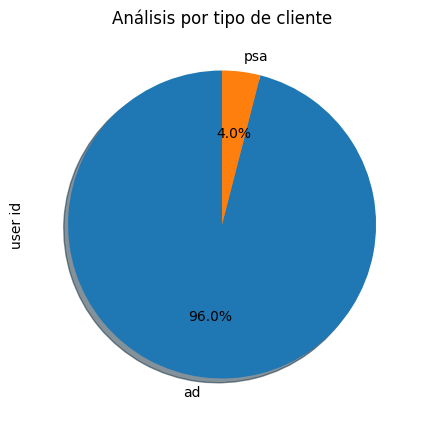

In [14]:
tipo_adv.plot.pie(figsize=(5,5),autopct='%1.1f%%', title="Análisis por tipo de cliente",
     shadow=True, startangle=90)

## Limpieza de datos


In [15]:
#Ver columnas del DF
data_mk.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [16]:
# quitar espacios de nombres de campos, ejemplo.
data_mk.rename(columns={"user id":"user_id", "total ads":"total_ads"})

,Unnamed: 0,user_id,test group,converted,total_ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [17]:
#Renombro columnas
data_mk.rename(columns=lambda col: col.strip().replace(" ","_"),inplace=True)
data_mk.columns

Index(['Unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads',
       'most_ads_day', 'most_ads_hour'],
      dtype='object')

In [18]:
#Elimino columna Unnamed porque repite los indices del dfda
data_mk.drop(["Unnamed:_0"], axis=1)
print("columns")

columns


In [19]:
labels = 'ad', 'psa'
sizes = [564577, 23524]



### Análisis A/B
Pasos: 
* Plantear h0 (nula) y h1 (alternativa)
* Definir nivel de confianza y alfa
* Definir el nivel estadistico de contraste, y el calulo del Pvalor
* Y por ultimo, comparar p valor con alfa. Si pvalor es menor que alfa, debo rechazar H0. Si pvalor es mayor a alfa, debo No rechazar H0.

### Definición de hipotesis:
h0= no existen diferencias entre si vio el anuncio o no vio el anuncio.
h1= si existen diferencias entre si ver el anuncio y no ver el anuncio.

### Definición nivel de confianza y alfa:
nivel de confianza : 95%
alfa= 1-0.95 = 0,05



In [20]:
data_mk["converted"] = data_mk["converted"].astype(int)
data_mk.head()

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


In [21]:
#filtramos los que tienen avisos y los que no

tratamiento_ad= data_mk.query('test_group == "ad"')
control_psa= data_mk.query('test_group == "psa"')
print(tratamiento_ad.head()["test_group"])
print(control_psa. head() ["test_group"])

0    ad
1    ad
2    ad
3    ad
4    ad
Name: test_group, dtype: object
18     psa
38     psa
68     psa
140    psa
157    psa
Name: test_group, dtype: object


In [22]:
print("promedio de conversion: " + str(tratamiento_ad['converted'].mean()))
print("promedio de conversion: " + str(control_psa['converted'].mean()))
print("promedio de conversion: " + str(data_mk['converted'].mean()))

promedio de conversion: 0.025546559636683747
promedio de conversion: 0.01785410644448223
promedio de conversion: 0.02523886203220195


In [23]:

## esto calcula la cantidad de clientes que vieron anuncio y comprar dividido todos los que recibieron anuncio
tasa_convert_ad=len(tratamiento_ad.query('converted == 1')) / len(tratamiento_ad)


## esto calcula la cantidad de clientes que vieron anuncio y comprar dividido todos los que no recibieron anuncio
tasa_convert_psa=len(control_psa.query('converted == 1')) / len(control_psa) 

print("conversion con anuncio:" + str(tasa_convert_ad))
print("conversion sin anuncio:" + str(tasa_convert_psa))

conversion con anuncio:0.025546559636683747
conversion sin anuncio:0.01785410644448223


In [33]:
con_ad=len(tratamiento_ad.query('converted == 1'))
total_vis=len(tratamiento_ad)


c_psa=len(control_psa.query('converted == 1'))
total_novis=len(control_psa) 


array_convirtio=np.array([con_ad, c_psa])
array_visualiza=np.array([total_vis, total_novis])


#Cálculos con ztest en ambas direcciones.
pvalor= proportions_ztest(count=array_convirtio, nobs=array_visualiza)[1]
tvalor=proportions_ztest(count=array_convirtio, nobs=array_visualiza)[0]

print("se deja el parametro 'alternative' que plantea por defecto probar si hay una diferencia signficativa en ambas direcciones")
print("el p valor es: "+str(pvalor))
print("el t valor es: "+str(tvalor))
status_prueba1=""


if pvalor<0.05:
    print("rechazoH0: se confirma que los que vieron el anuncio compraron más")
else: 
    print("no rechazo H0: no existe evidencia estadistica que nos confrime que ver el anuncio impacte que compren más")    




se deja el parametro 'alternative' que plantea por defecto probar si hay una dif signficativa en ambas dirección
el p valor es: 1.7052807161559727e-13
el t valor es: 7.3700781265454145
rechazoH0: se confirma que los que vieron el anuncio compraron más


In [36]:
#calculos con ztest tipo larger probar si la proporción en la primera muestra es mayor que en la segunda muestra.
pvalor= proportions_ztest(count=array_convirtio, nobs=array_visualiza, alternative='larger')[1]
tvalor=proportions_ztest(count=array_convirtio, nobs=array_visualiza, alternative='larger')[0]

print("se deja el parametro 'alternative' que plantea por defecto probar si hay una dif signficativa en ambas dirección")
print("el p valor es: "+str(pvalor))
print("el t valor es: "+str(tvalor))
status_prueba1=""


if pvalor<0.05:
    print("rechazoH0: se confirma que los que vieron el anuncio compraron más")
else: 
    print("no rechazo H0: no existe evidencia estadistica que nos confrime que ver el anuncio impacte que compren más")    



se deja el parametro 'alternative' que plantea por defecto probar si hay una dif signficativa en ambas dirección
el p valor es: 8.526403580779863e-14
el t valor es: 7.3700781265454145
rechazoH0: se confirma que los que vieron el anuncio compraron más


## Conclusión Final del estudio
A partir del Ztest se comprobó que la tasa superior de conversión de las personas que vieron los anuncios es estadisticamente representativa, por lo tanto se recomienda implementar las campañas por el efecto positivo que tienen en las compras de los clientes. 